Problem Statement : Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.

In this case study we are going to use the dataset given to us for predicting the reason for hospitalization for different regions. This can be done using Hypothesis testing using various tests where different categorical and numerical variables can be test against each other and draw meaningful insights. 
The main motive as data scientists is to draw insights and make recommendations which will help Apollo build a robust response system which can withstand any critical times in the country.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [2]:
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.graphics.gofplots import qqplot

In [3]:
apollo = pd.read_csv('C:/DSML/Apollo - case study/scaler_apollo_hospitals.csv')

In [4]:
apollo.shape

(1338, 8)

In [5]:
apollo.columns

Index(['Unnamed: 0', 'age', 'sex', 'smoker', 'region', 'viral load',
       'severity level', 'hospitalization charges'],
      dtype='object')

In [6]:
print(apollo['sex'].value_counts())
print(apollo['smoker'].value_counts())
print(apollo['region'].value_counts())
print(apollo['severity level'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64


In [7]:
apollo.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [8]:
apollo.dtypes

Unnamed: 0                   int64
age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

In [9]:
#converting severity level to object since this will be treated as a categorical variable
apollo['severity level'] = apollo['severity level'].astype('object')

# Missing value detection

In [10]:
apollo.isna().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

# Statistical Summary

In [11]:
apollo[['age','viral load','hospitalization charges']].describe(include='all')

,age,viral load,hospitalization charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,33176.058296
std,14.049960,2.032796,30275.029296
min,18.000000,5.320000,2805.000000
25%,27.000000,8.762500,11851.000000
50%,39.000000,10.130000,23455.000000
75%,51.000000,11.567500,41599.500000
max,64.000000,17.710000,159426.000000


# Visual Analysis

# Univariate Analysis

<AxesSubplot:xlabel='severity level', ylabel='count'>

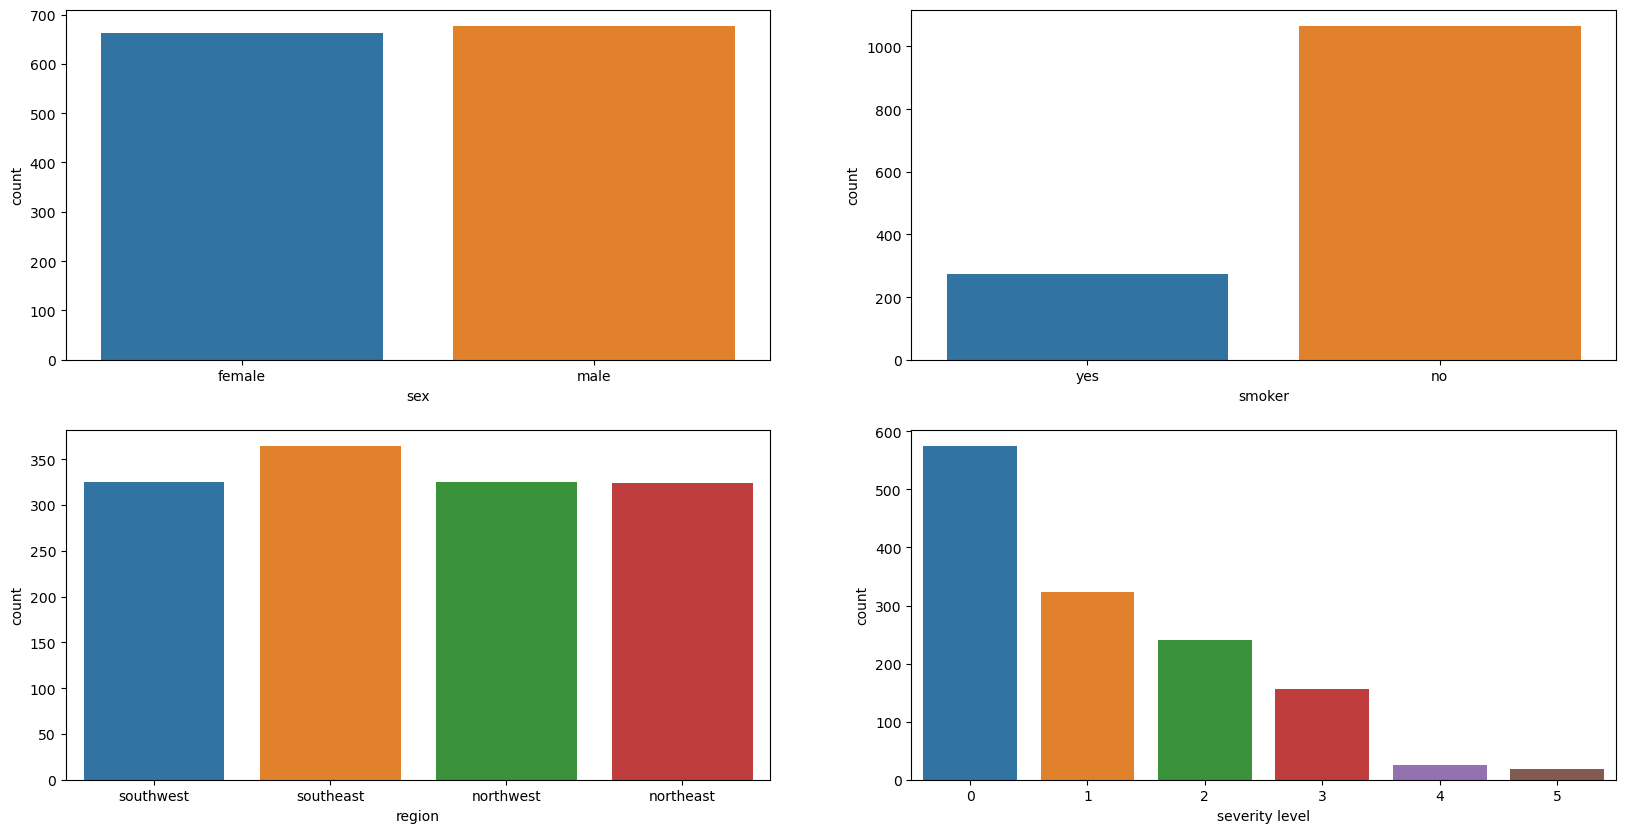

In [12]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.countplot(x = 'sex',data = apollo,ax=axis[0,0])
sns.countplot(x = 'smoker',data = apollo,ax=axis[0,1])
sns.countplot(x = 'region',data = apollo,ax=axis[1,0])
sns.countplot(x = 'severity level',data = apollo,ax=axis[1,1])

# Bivariate Analysis

<AxesSubplot:xlabel='severity level', ylabel='hospitalization charges'>

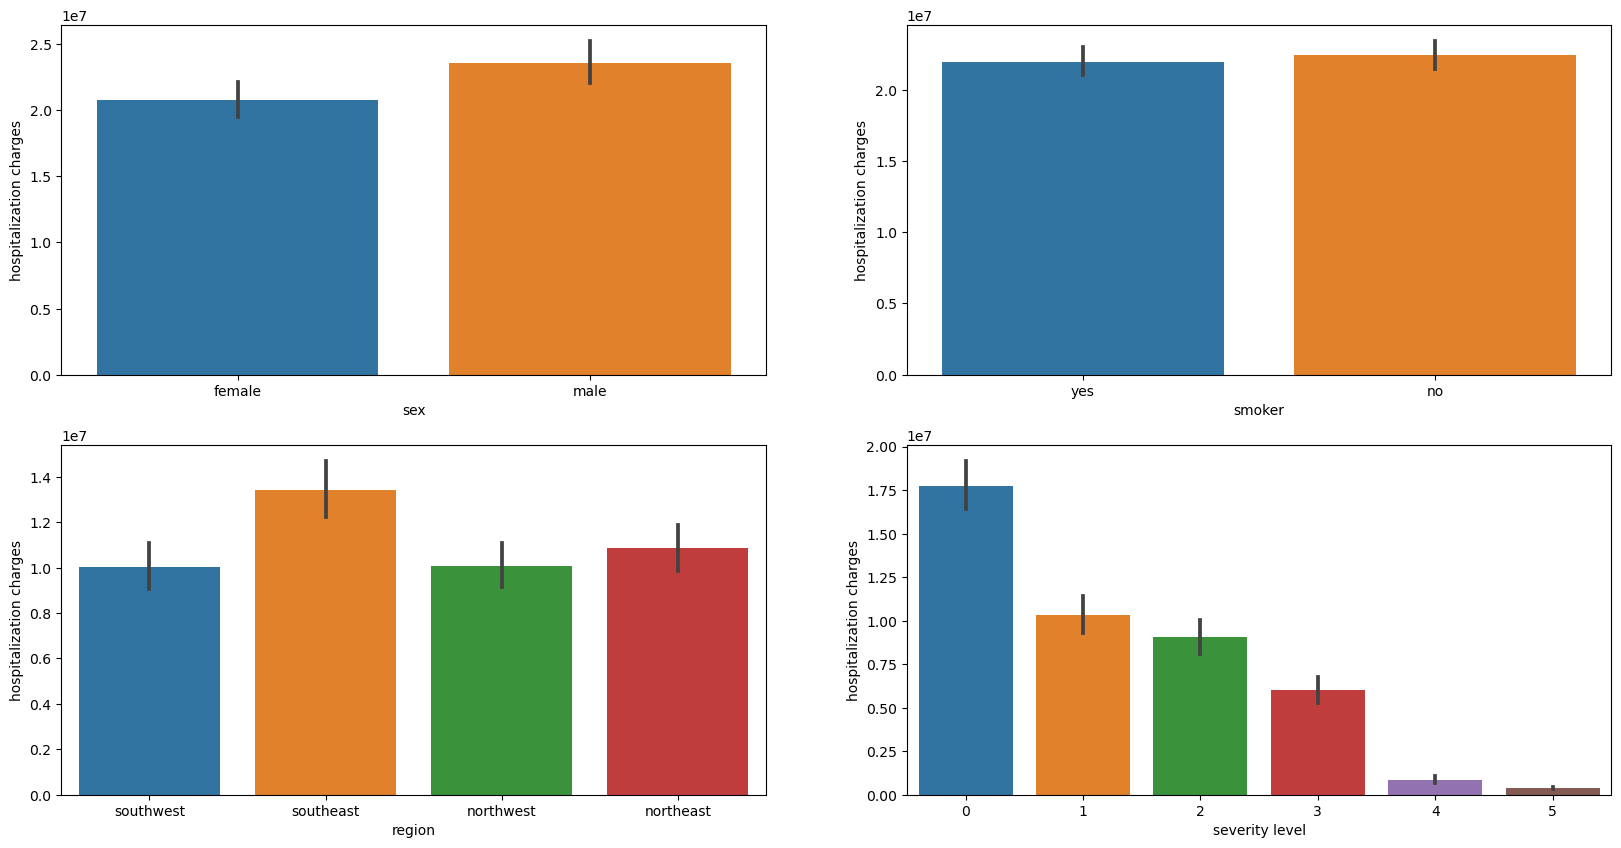

In [13]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.barplot(x = 'sex',y = 'hospitalization charges',data = apollo,estimator = np.sum,ax=axis[0,0])
sns.barplot(x = 'smoker',y = 'hospitalization charges',data = apollo,estimator = np.sum,ax=axis[0,1])
sns.barplot(x = 'region',y = 'hospitalization charges',data = apollo,estimator = np.sum,ax=axis[1,0])
sns.barplot(x = 'severity level',y = 'hospitalization charges',data = apollo,estimator = np.sum,ax=axis[1,1])

In [14]:
apollo['sex'] = apollo['sex'].astype('category')
apollo['smoker'] = apollo['smoker'].astype('category')
apollo['region'] = apollo['region'].astype('category')
apollo['severity level'] = apollo['severity level'].astype('category')

In [15]:
apollo.dtypes

Unnamed: 0                    int64
age                           int64
sex                        category
smoker                     category
region                     category
viral load                  float64
severity level             category
hospitalization charges       int64
dtype: object

<AxesSubplot:xlabel='viral load', ylabel='hospitalization charges'>

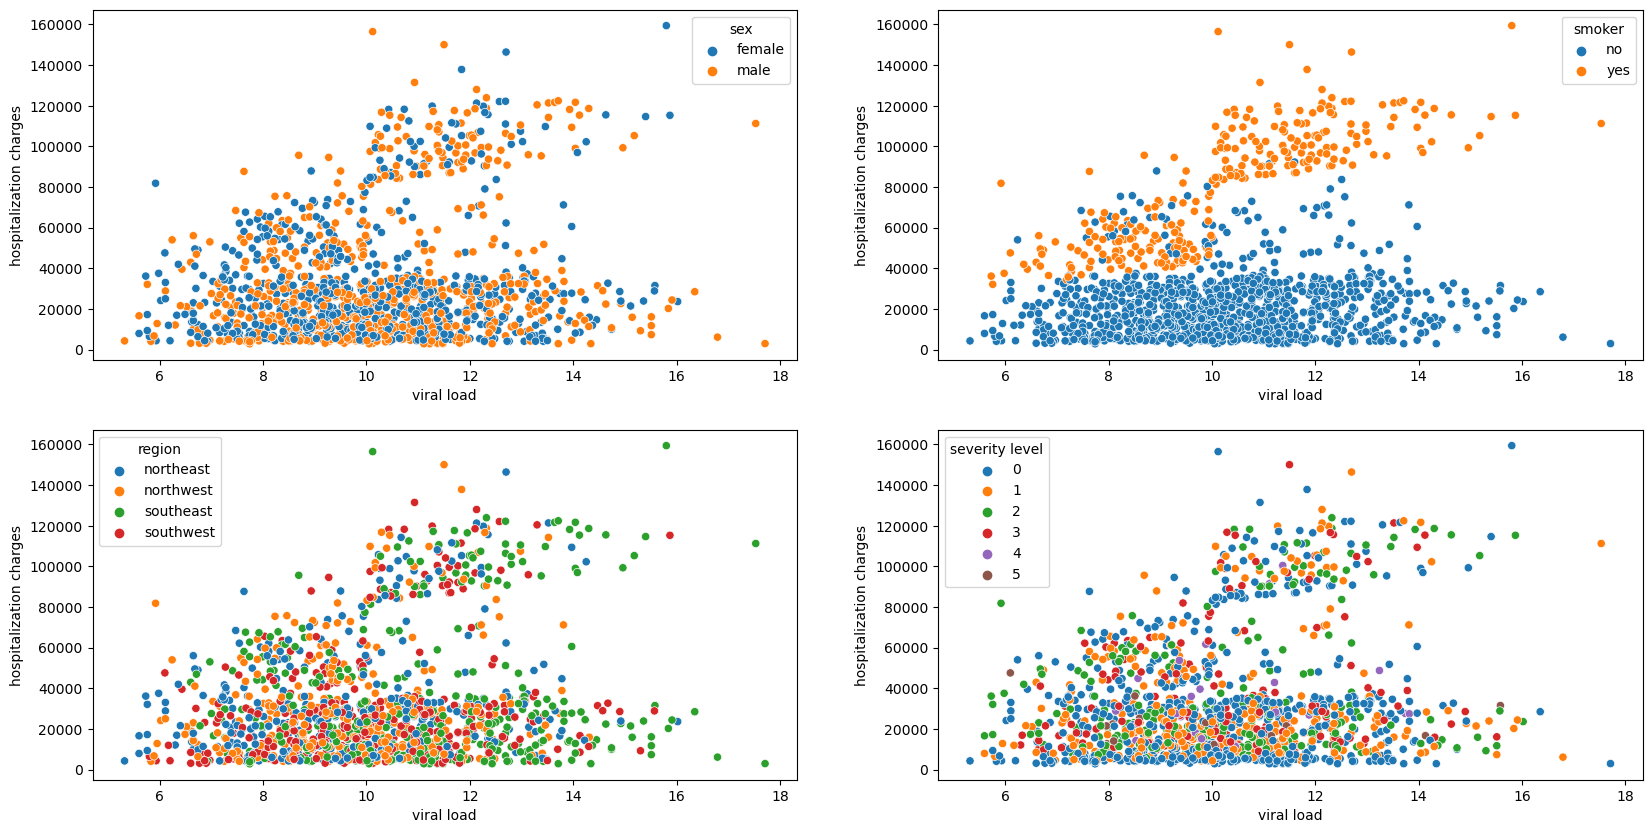

In [16]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.scatterplot(data=apollo, y='hospitalization charges',x='viral load',hue='sex',ax=axis[0,0])
sns.scatterplot(data=apollo, y='hospitalization charges',x='viral load',hue='smoker',ax=axis[0,1])
sns.scatterplot(data=apollo, y='hospitalization charges',x='viral load',hue='region',ax=axis[1,0])
sns.scatterplot(data=apollo, y='hospitalization charges',x='viral load',hue='severity level',ax=axis[1,1])

Text(0.5, 1.0, 'hospitalization charges vs severity level')

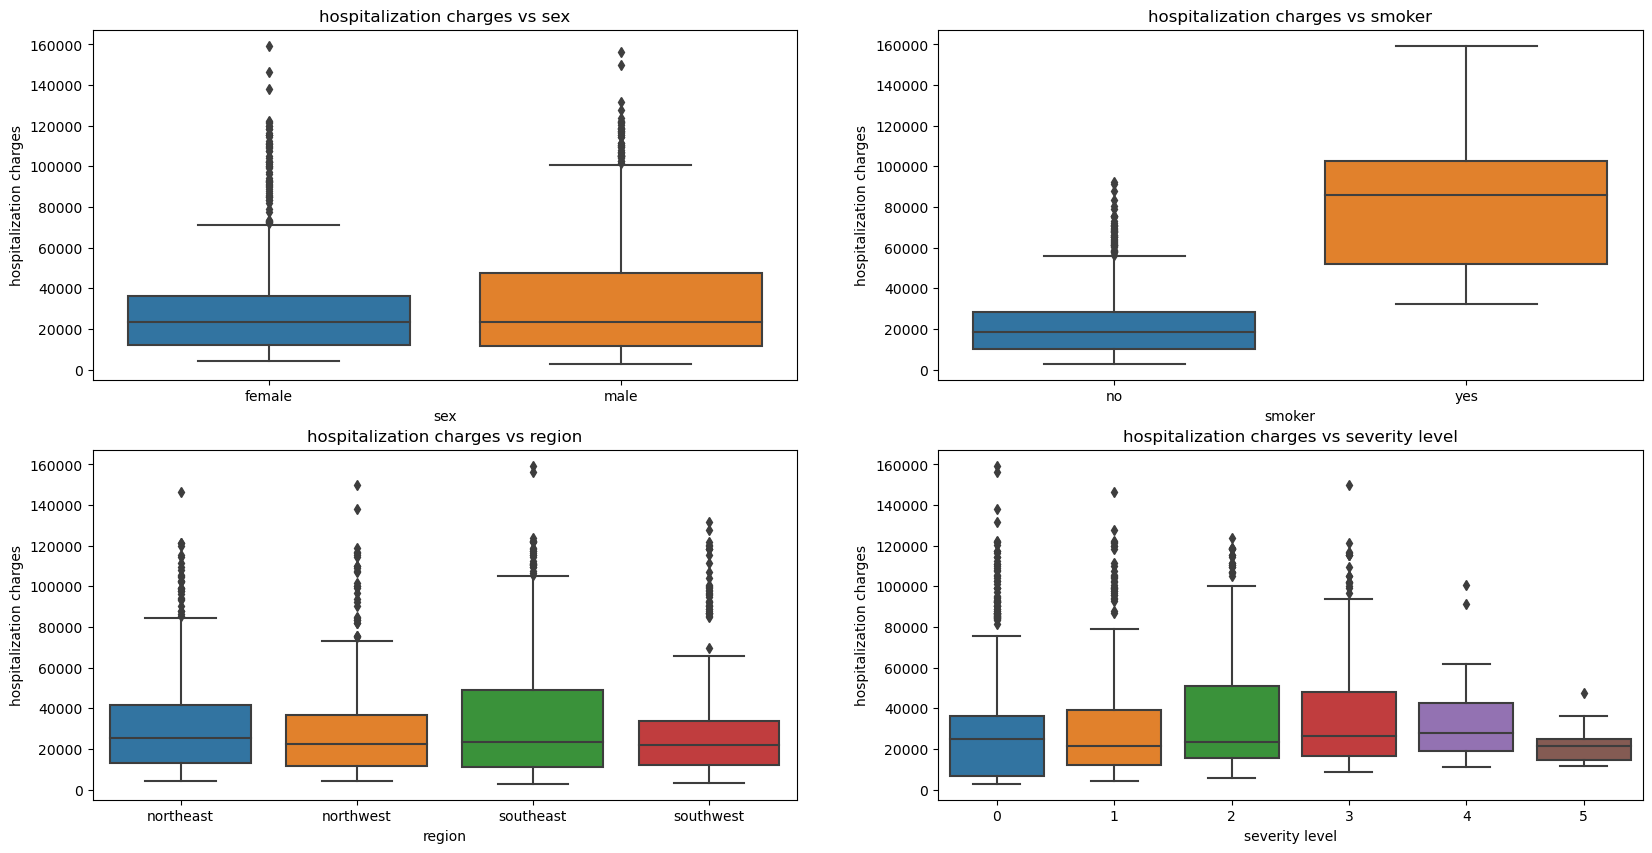

In [17]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.boxplot(data=apollo, y='hospitalization charges',x='sex',ax=axis[0,0]).set_title('hospitalization charges vs sex')
sns.boxplot(data=apollo, y='hospitalization charges',x='smoker',ax=axis[0,1]).set_title('hospitalization charges vs smoker')
sns.boxplot(data=apollo, y='hospitalization charges',x='region',ax=axis[1,0]).set_title('hospitalization charges vs region')
sns.boxplot(data=apollo, y='hospitalization charges',x='severity level',ax=axis[1,1]).set_title('hospitalization charges vs severity level')

<AxesSubplot:xlabel='severity level', ylabel='viral load'>

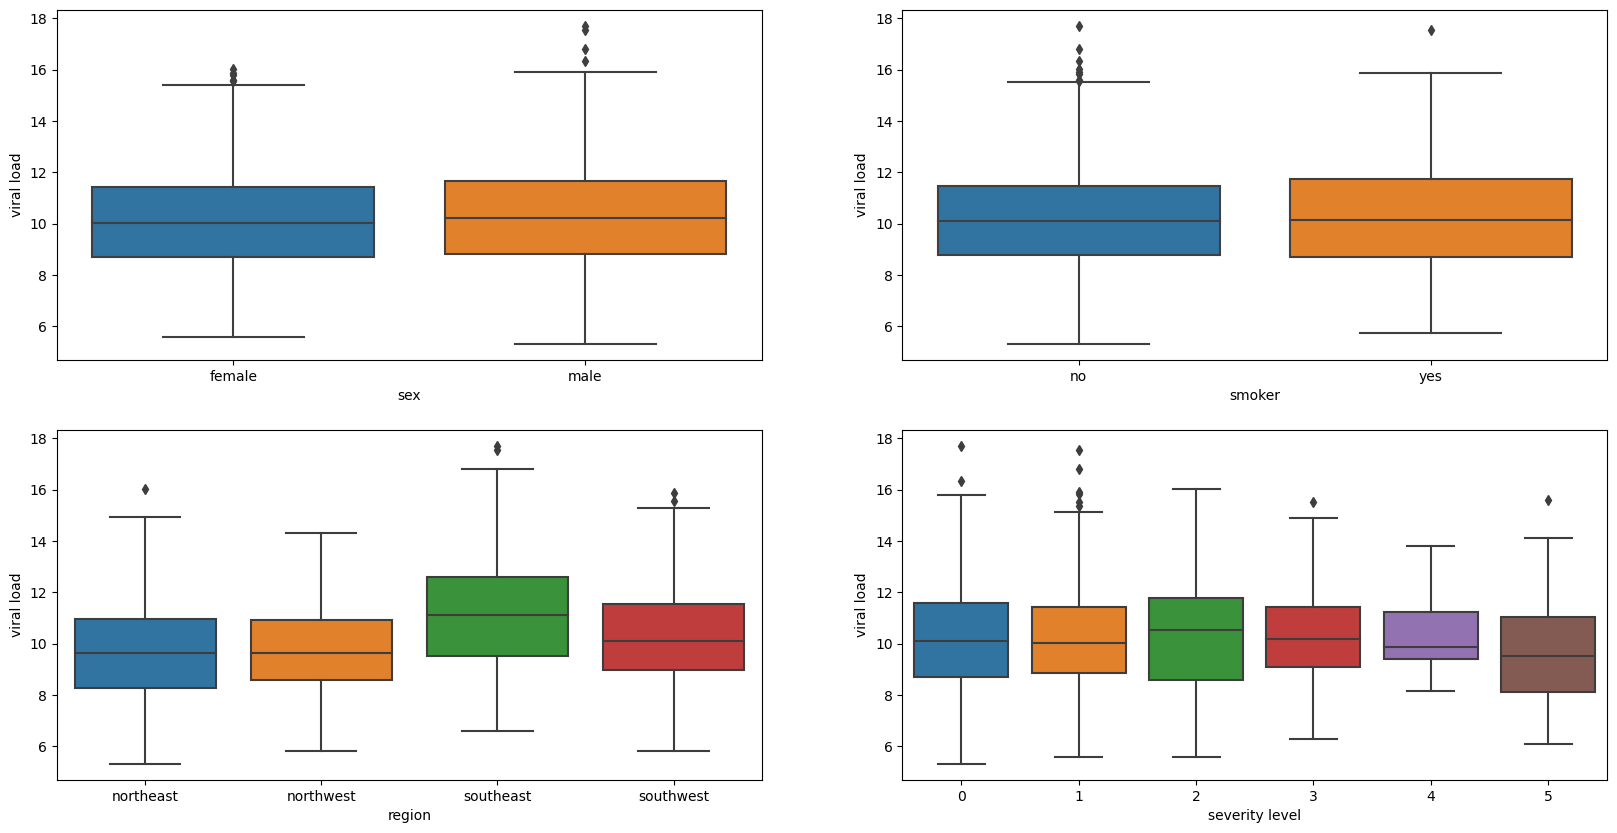

In [18]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.boxplot(data=apollo, y='viral load',x='sex',ax=axis[0,0])
sns.boxplot(data=apollo, y='viral load',x='smoker',ax=axis[0,1])
sns.boxplot(data=apollo, y='viral load',x='region',ax=axis[1,0])
sns.boxplot(data=apollo, y='viral load',x='severity level',ax=axis[1,1])

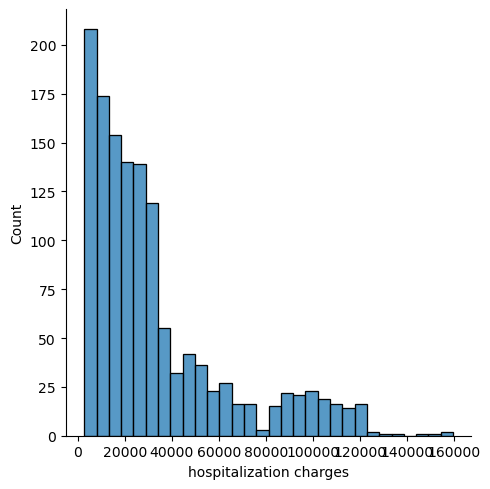

In [19]:
sns.displot(apollo['hospitalization charges'])

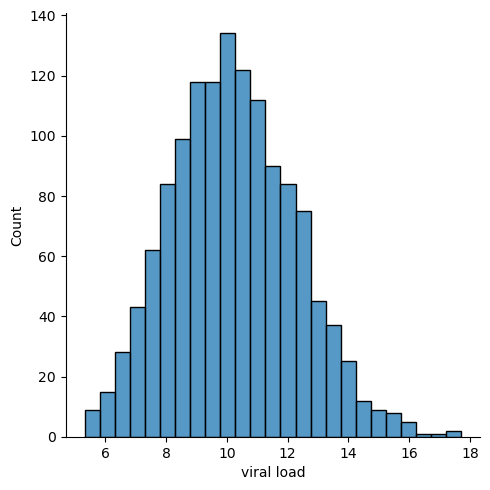

In [20]:
sns.displot(apollo['viral load'])

# Outlier treatment

<AxesSubplot:ylabel='hospitalization charges'>

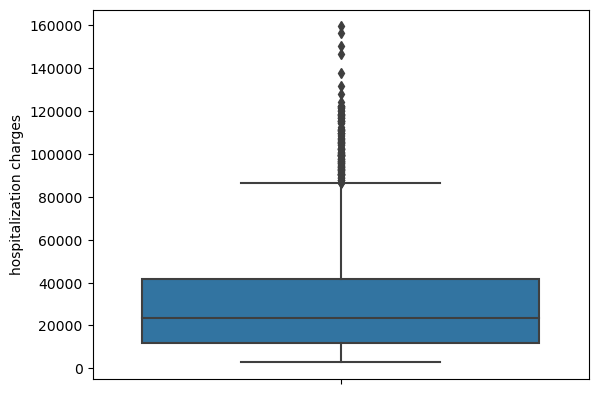

In [21]:
sns.boxplot(data=apollo, y='hospitalization charges')

In [22]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range


In [23]:
apollo1 = copy.deepcopy(apollo)

In [24]:
lower_range, upper_range = outlier_treatment(apollo1['hospitalization charges'])

In [25]:
percentage_outliers = 1 - len(apollo1[apollo1['hospitalization charges'] <= upper_range ]) / len(apollo1)
percentage_outliers

0.1038863976083707

In [26]:
apollo1.loc[apollo1['hospitalization charges'] > upper_range,['hospitalization charges']] = upper_range

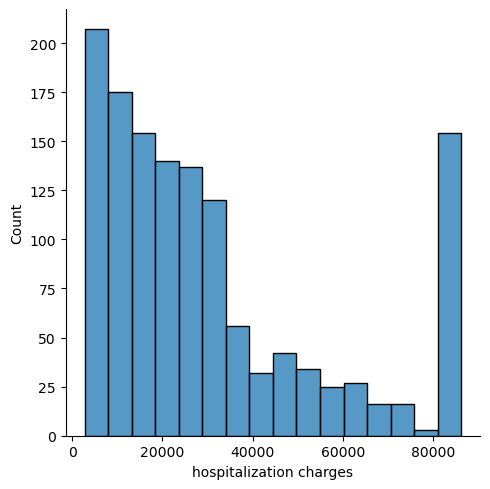

In [27]:
sns.displot(apollo1['hospitalization charges'])

# Hypothesis Testing

# Lets do the statistical analysis using the Hypothesis testing one by one for each case

# Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

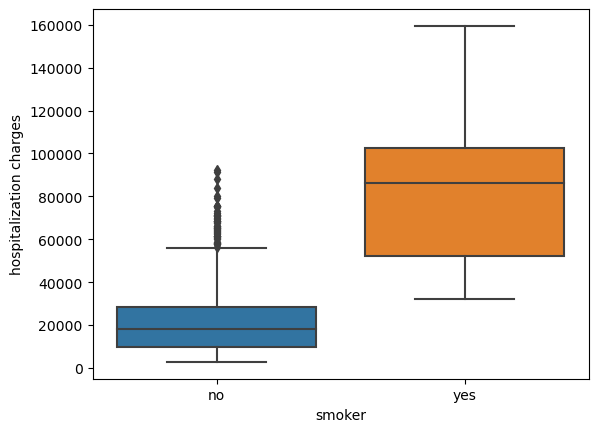

In [28]:
sns.boxplot(data=apollo, y='hospitalization charges',x='smoker')

In [29]:
# H0: The variance of smoker group is equal to non-smoker group
# Ha: The variance of smoker and non-smoker groups are not equal
smoker_group = apollo[apollo['smoker'] == 'yes']['hospitalization charges']
non_smoker_group = apollo[apollo['smoker'] == 'no']['hospitalization charges']
alpha = 0.05 # testing the null hypothesis at 95% confidence level
test_stat, p_value = levene(smoker_group,non_smoker_group)
if p_value < alpha:
    print('p_value:',p_value,'Hence we reject the H0 and say the variances are not equal')
else:
    print('p_value:',p_value,'Hence we fail to reject the H0 and say the variances are equal')

p_value: 1.5595259401311176e-66 Hence we reject the H0 and say the variances are not equal


In [30]:
# H0 : Hospitalization charges data is normally distributed
# Ha : Hospitalization charges data is not normally distributed
hosp_charges = apollo['hospitalization charges']
alpha = 0.05 # testing the null hypothesis at 95% confidence level
test_stat, p_value = shapiro(hosp_charges)
if p_value < alpha:
    print('p_value:',p_value,'Hence we reject the H0 and say the data is not normally distributed')
else:
    print('p_value:',p_value,'Hence we fail to reject the H0 and say the data is not normally distributed')

p_value: 1.1505333015369624e-36 Hence we reject the H0 and say the data is not normally distributed


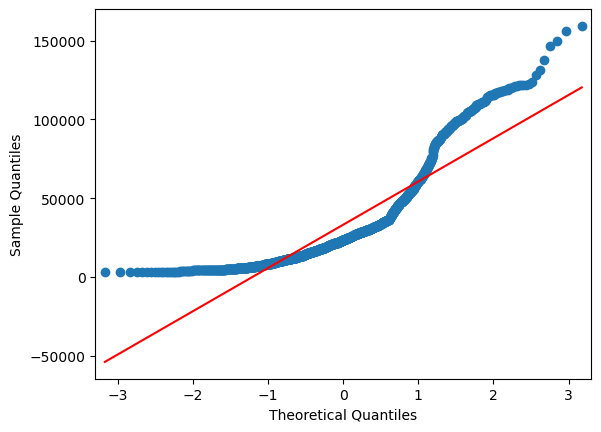

In [31]:
#We can also visualize the same using QQ-plot to visually represent what the data looks like in comparison 
#to normal distribution

qqplot(hosp_charges,line='r')
plt.show()

In [32]:
log_smoker_data = np.log10(smoker_group)
log_non_smoker_data = np.log10(non_smoker_group)

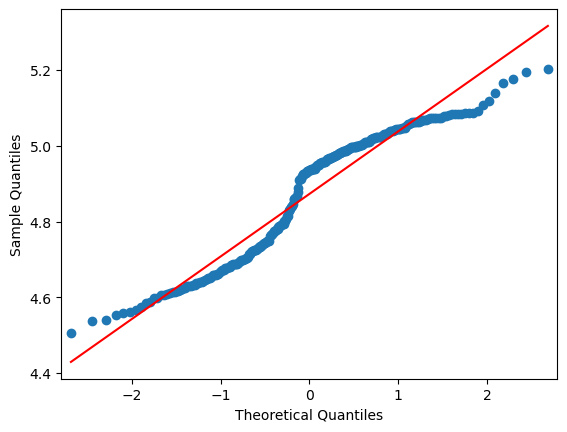

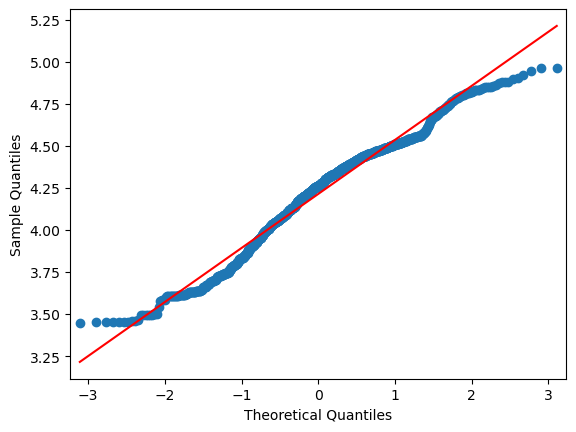

In [33]:
qqplot(log_smoker_data,line='r')
plt.show()
qqplot(log_non_smoker_data,line='r')
plt.show()

In [34]:
# H0: The smoker and non smoker groups have similar hospitalization charges
# Ha: The smoker group has more hospitaliization charges compared to non smoker group
test_stat, p_value = ttest_ind(log_smoker_data,log_non_smoker_data,alternative='greater')
alpha = 0.05 # testing the null hypothesis at 95% confidence level
if p_value < alpha:
    print('p_value:',p_value,'Hence we reject the H0 and say that the smoker group has higher hospitalization charges')
else:
    print('p_value:',p_value,'Hence we fail to reject the H0 and say both groups have similar hospitalization charges')

p_value: 3.152579721103535e-172 Hence we reject the H0 and say that the smoker group has higher hospitalization charges


# Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)

<AxesSubplot:xlabel='sex', ylabel='viral load'>

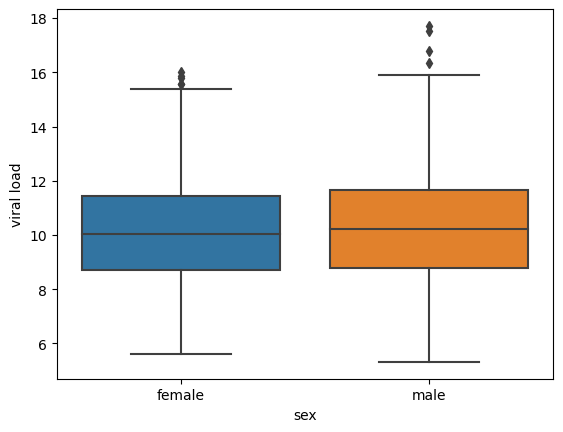

In [35]:
sns.boxplot(data=apollo, y='viral load',x='sex')

In [36]:
# H0: The variance of males is equal to females
# Ha: The variance of males and females are different
male = apollo[apollo['sex'] == 'male']['viral load']
female = apollo[apollo['sex'] == 'female']['viral load']
test_stat, p_value = levene(male,female)
alpha = 0.05 # testing the null hypothesis at 95% confidence level
if p_value < alpha:
    print('p_value:',p_value,'Hence we reject the H0 and say the variances are not equal')
else:
    print('p_value:',p_value,'Hence we fail to reject the H0 and say the variances are equal')

p_value: 0.9503708012456551 Hence we fail to reject the H0 and say the variances are equal


In [37]:
# H0 : Viral Load data is normally distributed
# Ha : Viral Load data is not normally distributed
viral_load = apollo['viral load']
test_stat, p_value = shapiro(viral_load)
alpha = 0.05 # testing the null hypothesis at 95% confidence level
if p_value < alpha:
    print('p_value:',p_value,'Hence we reject the H0 and say the data is not normally distributed')
else:
    print('p_value:',p_value,'Hence we fail to reject the H0 and say the data is not normally distributed')

p_value: 2.6902040190179832e-05 Hence we reject the H0 and say the data is not normally distributed


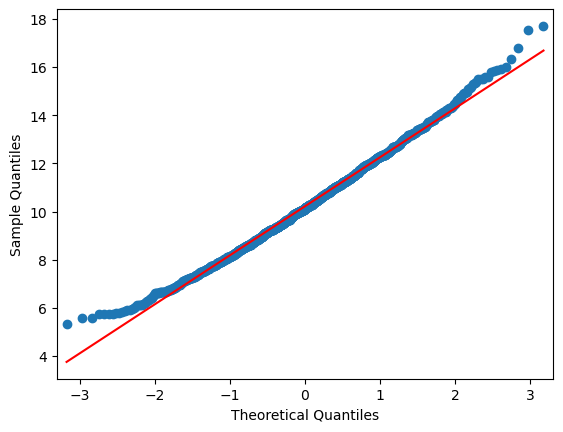

In [38]:
#We can also visualize the same using QQ-plot to visually represent what the data looks like in comparison 
#to normal distribution

qqplot(viral_load,line='r')
plt.show()

In [39]:
# H0: Males and Females have similar viral load
# Ha: Males and Females have different viral load
test_stat, p_value = ttest_ind(male,female)
alpha = 0.05 # testing the null hypothesis at 95% confidence level
if p_value < alpha:
    print('p_value:',p_value,'Hence we reject the H0 and say that the viral load in females is different from males')
else:
    print('p_value:',p_value,'Hence we fail to reject the H0 and say both groups have similar viral load')

p_value: 0.0901735841670204 Hence we fail to reject the H0 and say both groups have similar viral load


# Is the proportion of smoking significantly different across different regions? (Chi-square)

<AxesSubplot:xlabel='smoker', ylabel='Count'>

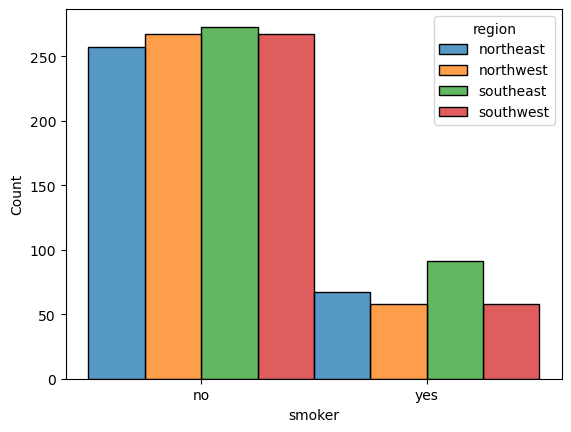

In [40]:
sns.histplot(binwidth=1,
            x='smoker',
            hue='region',
            data=apollo,
            stat="count",
            multiple="dodge")

In [41]:
smoking_region_data = pd.crosstab(index=apollo['smoker'],columns=apollo['region'])
smoking_region_data

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [42]:
# H0 : Proportion of smoking is similar across all the regions
# Ha : Proportion of smoking is significantly different across all regions
chi_stat, p_value, dof, expected = chi2_contingency(smoking_region_data)
alpha = 0.05 # testing the null hypothesis at 95% confidence level
print("chi_stat:",chi_stat)
if p_value < alpha:
    print('p_value:',p_value,'Hence we reject the H0 and say that roportion of smoking is significantly different across all regions')
else:
    print('p_value:',p_value,'Hence we fail to reject the H0 and say Proportion of smoking is similar across all the regions')

chi_stat: 7.34347776140707
p_value: 0.06171954839170547 Hence we fail to reject the H0 and say Proportion of smoking is similar across all the regions


# Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)

<AxesSubplot:xlabel='severity level', ylabel='viral load'>

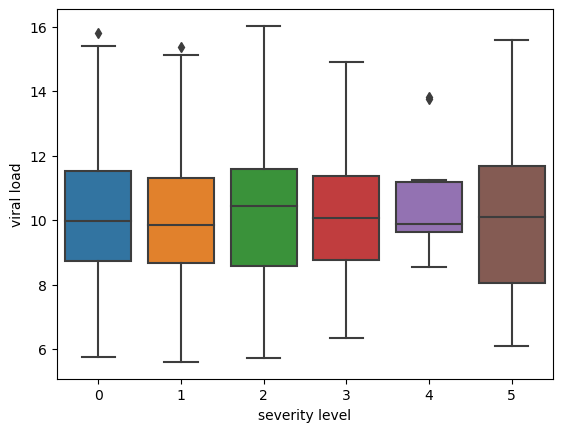

In [43]:
sns.boxplot(data=apollo[apollo['sex'] == 'female'], y='viral load',x='severity level')

In [44]:
# H0: The variance in viral load between women with with 0 Severity level , 1 Severity level, and 2 Severity level are the same
# Ha: The variance in viral load between women with with 0 Severity level , 1 Severity level, and 2 Severity level are different
women_severity_0 = apollo[(apollo['severity level'] == 0) & (apollo['sex'] == 'female')]['viral load']
women_severity_1 = apollo[(apollo['severity level'] == 1) & (apollo['sex'] == 'female')]['viral load']
women_severity_2 = apollo[(apollo['severity level'] == 2) & (apollo['sex'] == 'female')]['viral load']
alpha = 0.05 # testing the null hypothesis at 95% confidence level
test_stat, p_value = levene(women_severity_0,women_severity_1,women_severity_2)
if p_value < alpha:
    print('p_value:',p_value,'Hence we reject the H0 and say the variances are not equal')
else:
    print('p_value:',p_value,'Hence we fail to reject the H0 and say the variances are equal')

p_value: 0.38987253596513605 Hence we fail to reject the H0 and say the variances are equal


In [45]:
# H0 : Viral load data is normally distributed
# Ha : Viral load data is not normally distributed
viral_load = apollo['viral load']
alpha = 0.05 # testing the null hypothesis at 95% confidence level
test_stat, p_value = shapiro(viral_load)
if p_value < alpha:
    print('p_value:',p_value,'Hence we reject the H0 and say the data is not normally distributed')
else:
    print('p_value:',p_value,'Hence we fail to reject the H0 and say the data is not normally distributed')

p_value: 2.6902040190179832e-05 Hence we reject the H0 and say the data is not normally distributed


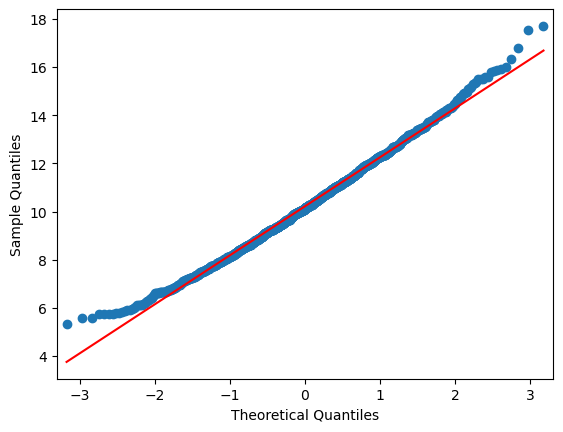

In [46]:
#We can also visualize the same using QQ-plot to visually represent what the data looks like in comparison 
#to normal distribution

qqplot(viral_load,line='r')
plt.show()

In [47]:
print('no of women with severity 0 : ',len(women_severity_0))
print('no of women with severity 1 : ',len(women_severity_1))
print('no of women with severity 2 : ',len(women_severity_2))

no of women with severity 0 :  289
no of women with severity 1 :  158
no of women with severity 2 :  119


In [48]:
# H0: Viral load between females of severity levels 0, 1 and 2 are the same
# Ha: Viral load between females of severity levels 0, 1 and 2 are different
f_stat, p_value = f_oneway(women_severity_0.sample(119),women_severity_1.sample(119),women_severity_2.sample(119))
alpha = 0.05 # testing the null hypothesis at 95% confidence level
if p_value < alpha:
    print('p_value:',p_value,'Hence we reject the H0 and say that the Viral load between females of severity levels 0, 1 and 2 are different')
else:
    print('p_value:',p_value,'Hence we fail to reject the H0 and say Viral load between females of severity levels 0, 1 and 2 are the same')


p_value: 0.48352764350413124 Hence we fail to reject the H0 and say Viral load between females of severity levels 0, 1 and 2 are the same
